In [1]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.metrics import structural_similarity as ssim

In [15]:
# Enhance the contrast of the image
def enhance_contrast(name, image):
    
    image = cv2.GaussianBlur(image,(5,5),0)
    
    #type1 - imadjust
    def imadjust(x,a,b,c,d,gamma=0.8):
        # Similar to imadjust in MATLAB.
        # Converts an image range from [a,b] to [c,d].
        # The Equation of a line can be used for this transformation:
        #   y=((d-c)/(b-a))*(x-a)+c
        # However, it is better to use a more generalized equation:
        #   y=((x-a)/(b-a))^gamma*(d-c)+c
        # If gamma is equal to 1, then the line equation is used.
        # When gamma is not equal to 1, then the transformation is not linear.
        y = (((x - a) / (b - a)) ** gamma) * (d - c) + c
        return y
    imadjust_image = imadjust(image, image.min(), image.max(), 0, 1)
    imadjust_image = imadjust_image*255.0
    imadjust_image = imadjust_image.astype(np.uint8)
    imadjusted_image = cv2.cvtColor(imadjust_image, cv2.COLOR_BGR2RGB)
    
    #type2 - histogram equalisation
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    hist= cv2.equalizeHist(gray)
    hist_equalised_image = cv2.cvtColor(hist, cv2.COLOR_GRAY2RGB)
    
    #type3 - CLAHE
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    clahe_image = clahe.apply(gray)
    clahe_equalised_image = cv2.cvtColor(clahe_image, cv2.COLOR_GRAY2RGB)
    
    cv2.imwrite(name+'_imadjust.png', cv2.cvtColor(imadjust_image, cv2.COLOR_RGB2BGR))
    cv2.imwrite(name+'_histogramEqualised.png', cv2.cvtColor(hist_equalised_image, cv2.COLOR_RGB2BGR))
    cv2.imwrite(name+'_CLAHE.png', cv2.cvtColor(clahe_equalised_image, cv2.COLOR_RGB2BGR))
    
    return [imadjusted_image, hist_equalised_image, clahe_equalised_image]

In [3]:
def visualise_contrast_enhanced_image(image, enhanced_images):
    
    figure, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0}, figsize = (15,15))
    
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    ax1.imshow(image)
    ax2.imshow(enhanced_images[0])
    ax3.imshow(enhanced_images[1])
    ax4.imshow(enhanced_images[2])
    
    ax1.set_title('original')
    ax2.set_title('imadjust')
    ax3.set_title('hist_equalised')
    ax4.set_title('CLAHE')

In [4]:
def visualise_enhancement_by_histogram(image, enhanced_images):
    
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    for i in range(len(enhanced_images)):
        enhanced_images[i] = cv2.cvtColor(enhanced_images[i], cv2.COLOR_RGB2GRAY)
    
    figure, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, sharex=True, sharey=True)
    ax1.hist(image.ravel(),256,[1,256])
    ax2.hist(enhanced_images[0].ravel(),256,[1,256])
    ax3.hist(enhanced_images[1].ravel(),256,[1,256])
    ax4.hist(enhanced_images[2].ravel(),256,[5,256])
    
    ax1.set_title('original')
    ax2.set_title('imadjust')
    ax3.set_title('hist_equalised')
    ax4.set_title('CLAHE')
    
    figure.set_figheight(15)
    figure.set_figwidth(15)

In [5]:
def edge_detectors(name, enhancement, image):
    
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    
    #Canny
    canny_edges = cv2.Canny(image,200,300)
    
    #Sobel
    sobelx = cv2.Sobel(image,cv2.CV_64F,1,0,ksize=5)
    sobely = cv2.Sobel(image,cv2.CV_64F,0,1,ksize=5)
    sobel_edges = sobelx+sobely
    
    #prewitt
    def prewitt_edge_detection(image):
        img_gaussian = cv2.GaussianBlur(image,(3,3),0)
        kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
        kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
        img_prewittx = cv2.filter2D(img_gaussian, -1, kernelx)
        img_prewitty = cv2.filter2D(img_gaussian, -1, kernely)
        return img_prewittx+img_prewitty
    prewitt_edges = prewitt_edge_detection(image)
    
    cv2.imwrite(name+'_'+enhancement+'_canny_detection.png', canny_edges)
    cv2.imwrite(name+'_'+enhancement+'_sobel_detection.png', sobel_edges)
    cv2.imwrite(name+'_'+enhancement+'_prewitt_detection.png', prewitt_edges)
    
    return [canny_edges, sobel_edges, prewitt_edges]

In [6]:
def visualise_edges(image, edge_images):
    
    figure, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0}, figsize = (15,15))
    
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    edge_images[0] = cv2.cvtColor(edge_images[0], cv2.COLOR_BGR2RGB)
    edge_images[2] = cv2.cvtColor(edge_images[2], cv2.COLOR_BGR2RGB)
    
    ax1.imshow(image)
    ax2.imshow(edge_images[0])
    ax3.imshow(edge_images[1])
    ax4.imshow(edge_images[2])
    
    ax1.set_title('original')
    ax2.set_title('Canny')
    ax3.set_title('Sobel')
    ax4.set_title('Prewitt')

In [7]:
def edge_detection_score(image, edge_images):
    
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    edge_images[0] = cv2.cvtColor(edge_images[0], cv2.COLOR_RGB2GRAY)
    edge_images[2] = cv2.cvtColor(edge_images[2], cv2.COLOR_RGB2GRAY)
    clipped = np.clip(edge_images[1],0,255)
    clipped = clipped.astype(np.uint8)
    edge_images[1] = clipped
    edge_images[1] = cv2.cvtColor(edge_images[1], cv2.COLOR_RGB2GRAY)
    
    (score0, diff0) = ssim(image, edge_images[0], full=True)
    (score1, diff1) = ssim(image, edge_images[1], full=True)
    (score2, diff2) = ssim(image, edge_images[2], full=True)
    
    print('Canny_Score = ', score0)
    print('Sobel_Score = ', score1)
    print('Prewitt_Score = ', score2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Canny_Score =  0.20385146404117133
Sobel_Score =  0.1837728488127514
Prewitt_Score =  0.2849820613004705


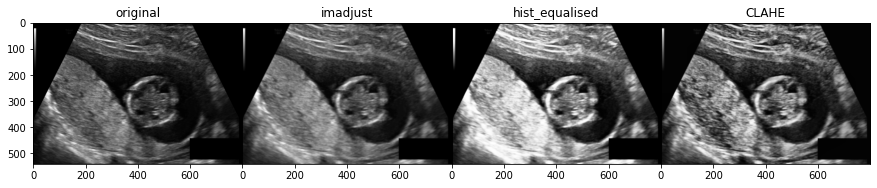

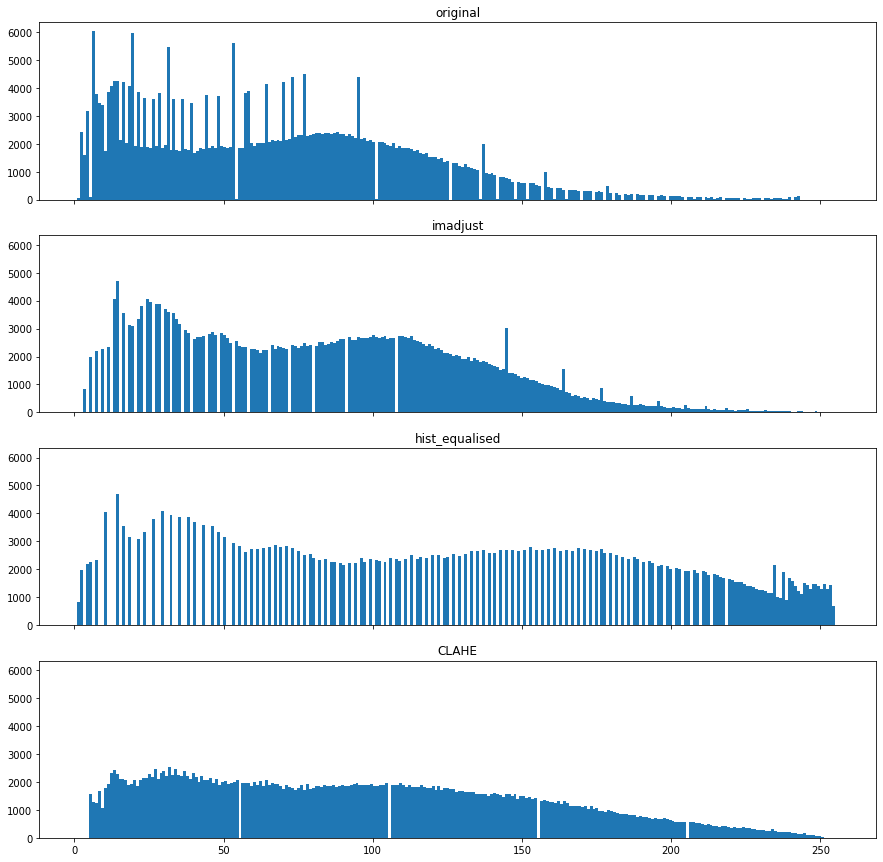

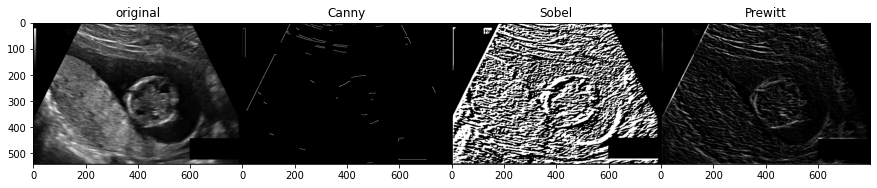

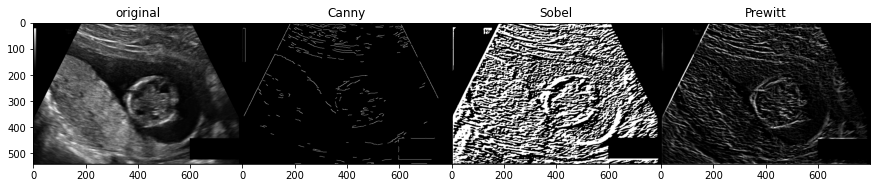

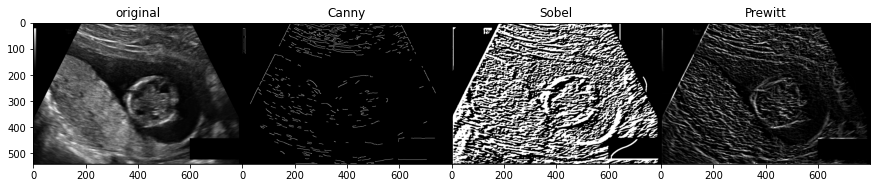

In [16]:
name = '114_HC'
image = cv2.imread('29/'+name+'.png')
enhanced_images = enhance_contrast(name,image)
visualise_contrast_enhanced_image(image, enhanced_images)
visualise_enhancement_by_histogram(image, enhanced_images)
edge_images = edge_detectors(name,'imadjust', enhanced_images[0])
visualise_edges(image, edge_images)
edge_images = edge_detectors(name,'hist_equalised', enhanced_images[1])
visualise_edges(image, edge_images)
edge_images = edge_detectors(name,'CLAHE', enhanced_images[2])
visualise_edges(image, edge_images)
edge_detection_score(image, edge_images)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Canny_Score =  0.11160603342030151
Sobel_Score =  0.0783424808857589
Prewitt_Score =  0.19337532559092638


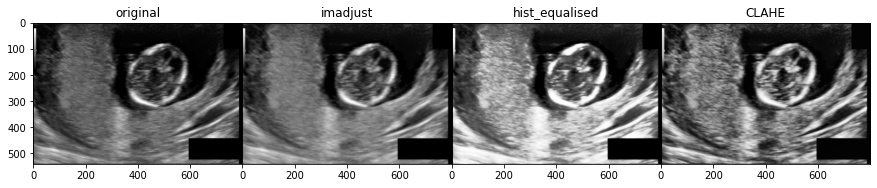

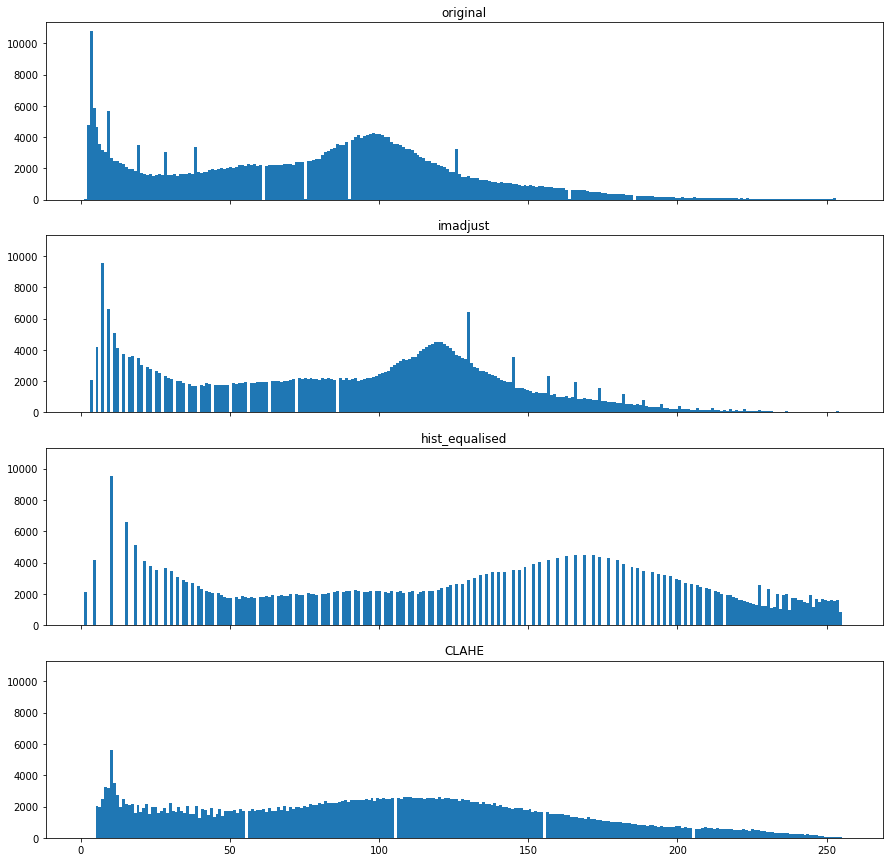

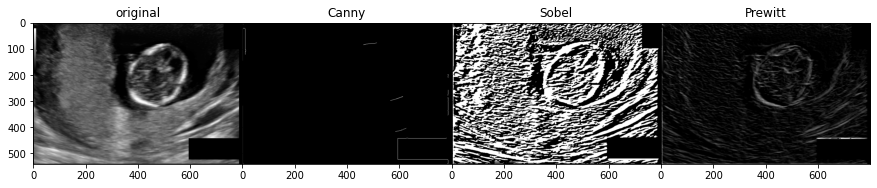

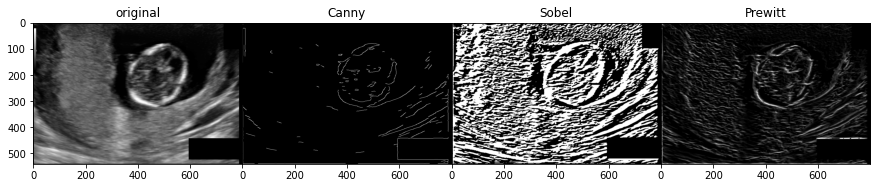

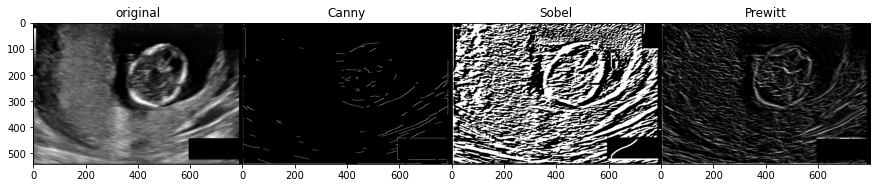

In [17]:
name = '115_HC'
image = cv2.imread('29/'+name+'.png')
enhanced_images = enhance_contrast(name,image)
visualise_contrast_enhanced_image(image, enhanced_images)
visualise_enhancement_by_histogram(image, enhanced_images)
edge_images = edge_detectors(name,'imadjust', enhanced_images[0])
visualise_edges(image, edge_images)
edge_images = edge_detectors(name,'hist_equalised', enhanced_images[1])
visualise_edges(image, edge_images)
edge_images = edge_detectors(name,'CLAHE', enhanced_images[2])
visualise_edges(image, edge_images)
edge_detection_score(image, edge_images)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Canny_Score =  0.23316248401662473
Sobel_Score =  0.18135435198387262
Prewitt_Score =  0.35747660726711056


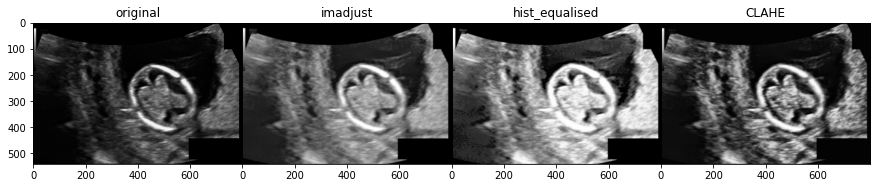

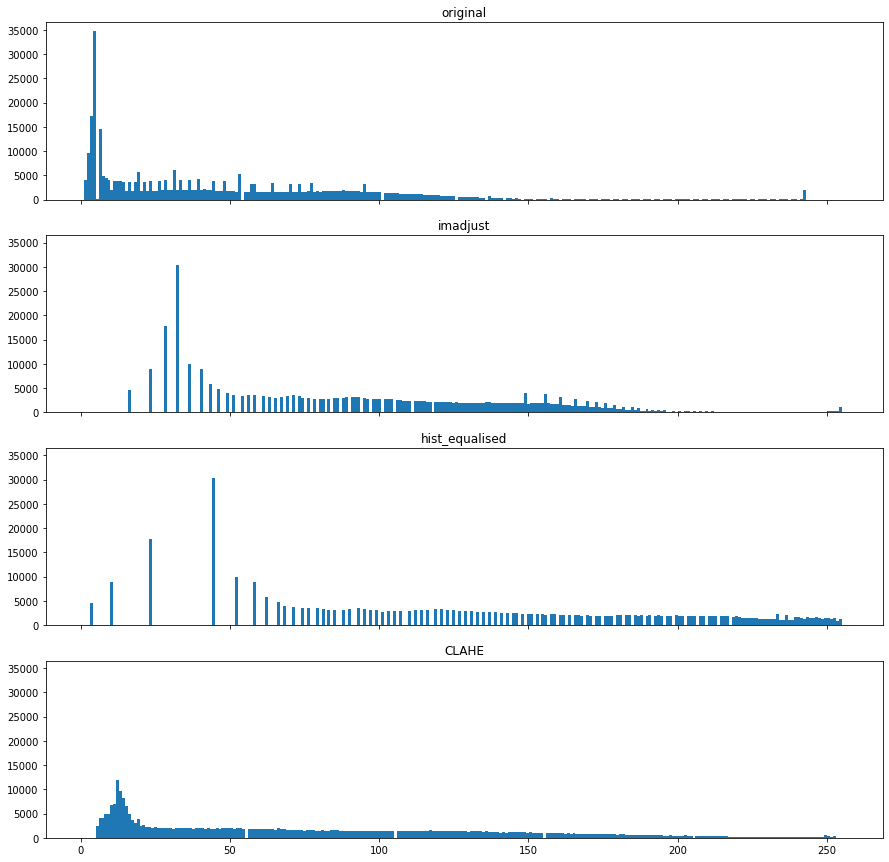

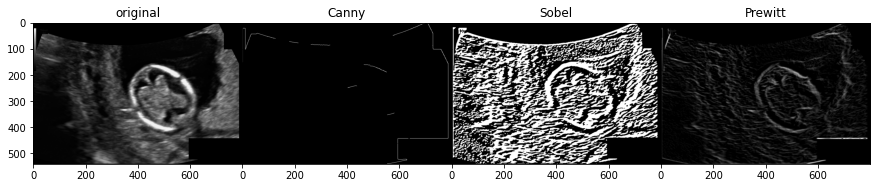

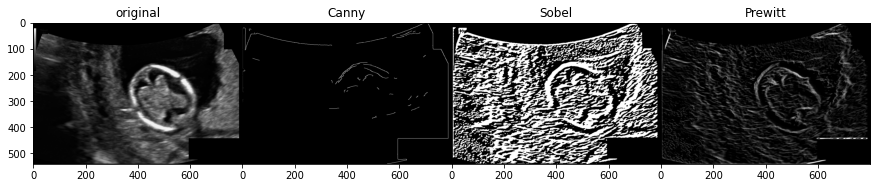

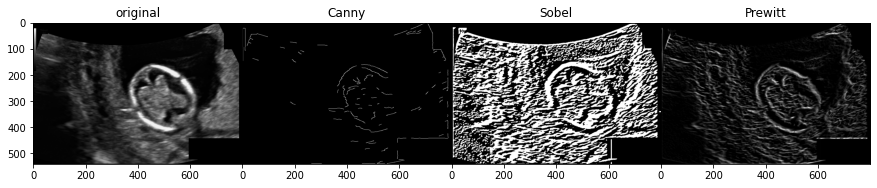

In [10]:
name = '116_HC'
image = cv2.imread('29/'+name+'.png')
enhanced_images = enhance_contrast(name,image)
visualise_contrast_enhanced_image(image, enhanced_images)
visualise_enhancement_by_histogram(image, enhanced_images)
edge_images = edge_detectors(name,'imadjust', enhanced_images[0])
visualise_edges(image, edge_images)
edge_images = edge_detectors(name,'hist_equalised', enhanced_images[1])
visualise_edges(image, edge_images)
edge_images = edge_detectors(name,'CLAHE', enhanced_images[2])
visualise_edges(image, edge_images)
edge_detection_score(image, edge_images)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Canny_Score =  0.06584318432949857
Sobel_Score =  0.06381836901630611
Prewitt_Score =  0.17365652853548774


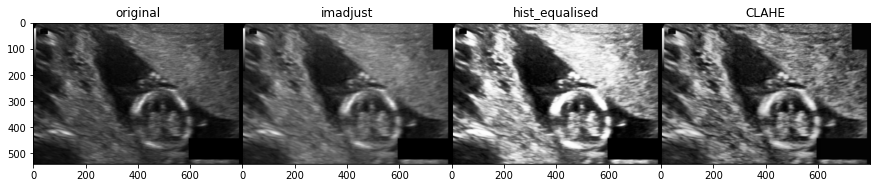

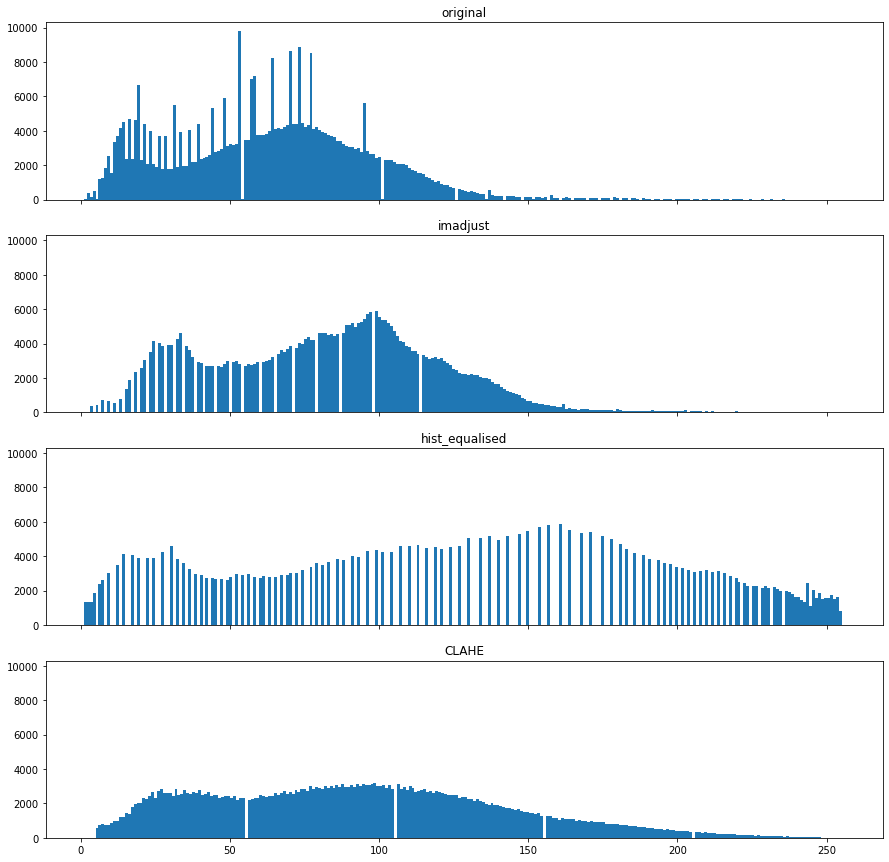

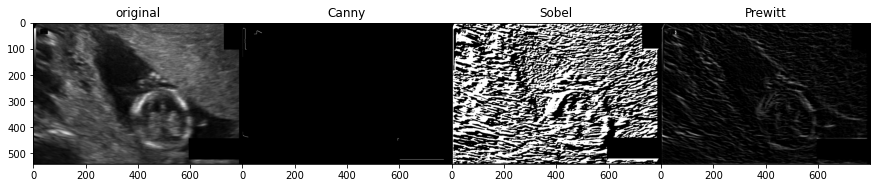

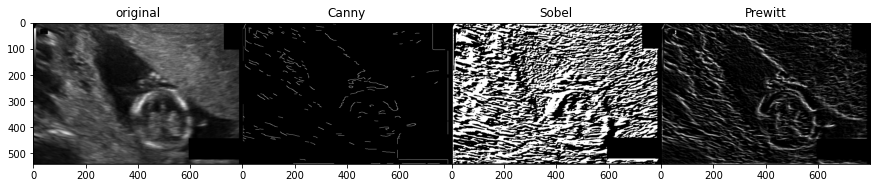

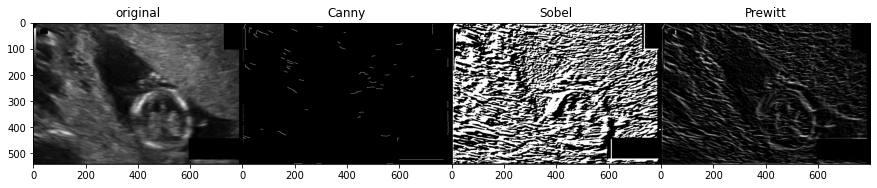

In [18]:
name = '117_HC'
image = cv2.imread('29/'+name+'.png')
enhanced_images = enhance_contrast(name,image)
visualise_contrast_enhanced_image(image, enhanced_images)
visualise_enhancement_by_histogram(image, enhanced_images)
edge_images = edge_detectors(name,'imadjust', enhanced_images[0])
visualise_edges(image, edge_images)
edge_images = edge_detectors(name,'hist_equalised', enhanced_images[1])
visualise_edges(image, edge_images)
edge_images = edge_detectors(name,'CLAHE', enhanced_images[2])
visualise_edges(image, edge_images)
edge_detection_score(image, edge_images)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Canny_Score =  0.1118636414060921
Sobel_Score =  0.08200684935993914
Prewitt_Score =  0.19108291987173928


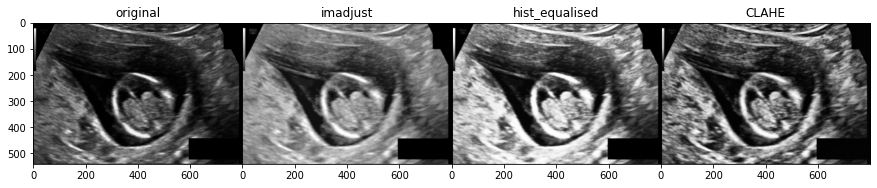

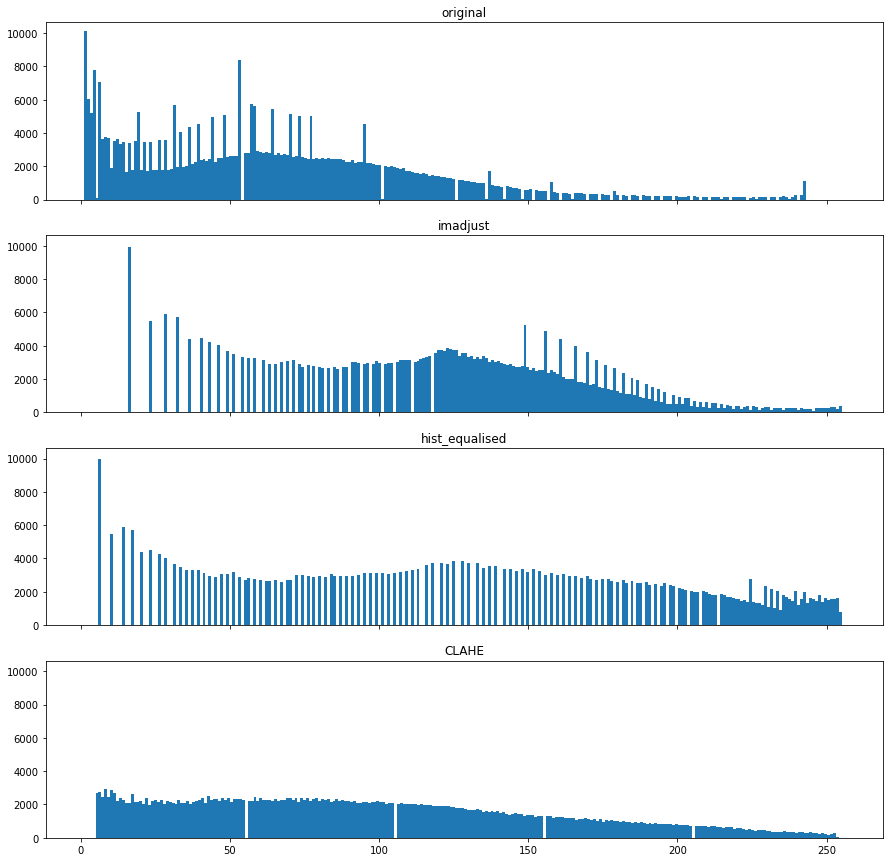

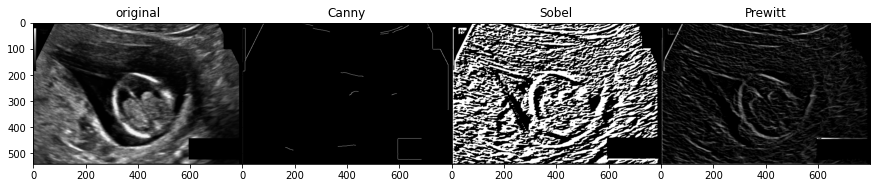

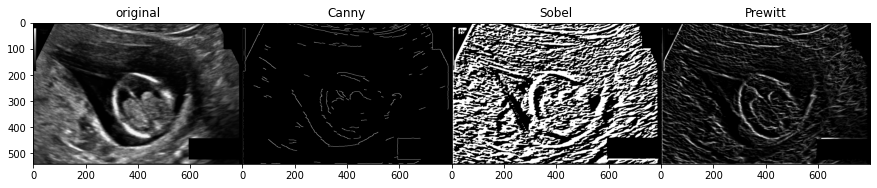

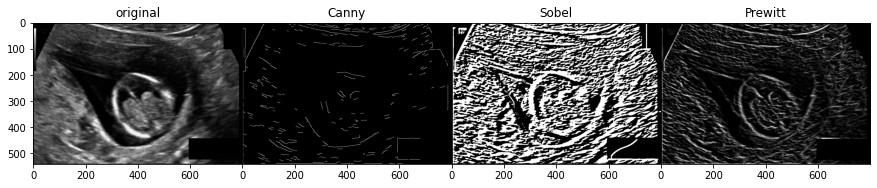

In [12]:
name = '118_HC'
image = cv2.imread('29/'+name+'.png')
enhanced_images = enhance_contrast(name,image)
visualise_contrast_enhanced_image(image, enhanced_images)
visualise_enhancement_by_histogram(image, enhanced_images)
edge_images = edge_detectors(name,'imadjust', enhanced_images[0])
visualise_edges(image, edge_images)
edge_images = edge_detectors(name,'hist_equalised', enhanced_images[1])
visualise_edges(image, edge_images)
edge_images = edge_detectors(name,'CLAHE', enhanced_images[2])
visualise_edges(image, edge_images)
edge_detection_score(image, edge_images)

In [13]:
import skimage
skimage.__version__

'0.17.2'